In [3]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset

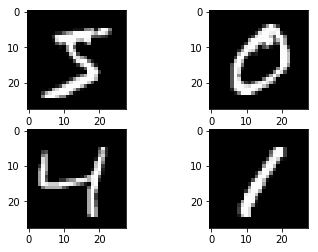

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [6]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2783 - acc: 0.9211 - val_loss: 0.1414 - val_acc: 0.9573
Epoch 2/10
 - 4s - loss: 0.1116 - acc: 0.9677 - val_loss: 0.0924 - val_acc: 0.9706
Epoch 3/10
 - 4s - loss: 0.0721 - acc: 0.9797 - val_loss: 0.0788 - val_acc: 0.9767
Epoch 4/10
 - 5s - loss: 0.0506 - acc: 0.9856 - val_loss: 0.0736 - val_acc: 0.9774
Epoch 5/10
 - 5s - loss: 0.0376 - acc: 0.9893 - val_loss: 0.0678 - val_acc: 0.9788
Epoch 6/10
 - 5s - loss: 0.0270 - acc: 0.9927 - val_loss: 0.0633 - val_acc: 0.9802
Epoch 7/10
 - 5s - loss: 0.0209 - acc: 0.9947 - val_loss: 0.0625 - val_acc: 0.9809
Epoch 8/10
 - 4s - loss: 0.0142 - acc: 0.9969 - val_loss: 0.0634 - val_acc: 0.9802
Epoch 9/10
 - 4s - loss: 0.0109 - acc: 0.9978 - val_loss: 0.0595 - val_acc: 0.9806
Epoch 10/10
 - 5s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0596 - val_acc: 0.9814
Baseline Error: 1.86%


# check model on few examples

In [13]:
ynew = model.predict_classes(X_train)

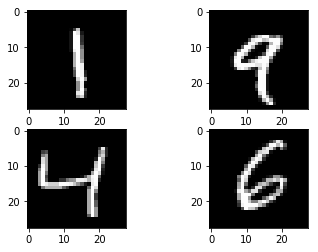

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[1202], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [15]:
ynew[8]

1

In [16]:
ynew[4]

9

In [17]:
ynew[2]

4

In [18]:
ynew[1202]

6